# Adjacency List

Easiest graph format, no need to worry about going out of bounds.

We can use a hashmap where its key is a vertex and it maps to a array of its neighbours (also vertices)
- this only works if its keys are unique


In [ ]:
# GraphNode used for adjacency list
class GraphNode:
    def __init__(self, val):
        self.val = val
        self.neighbors = []

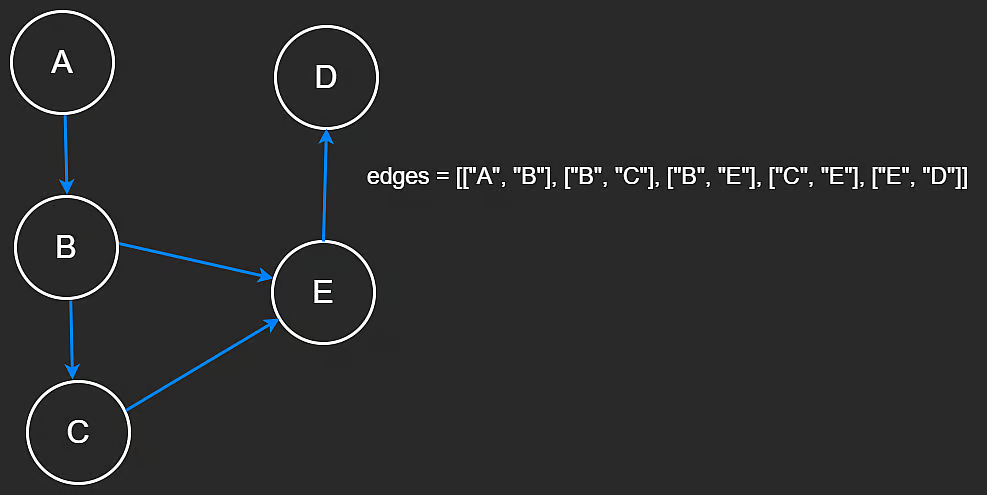

In [ ]:
# OR use a HashMap, way way more common
adjList = { "A": [], "B": [] }

# Given directed edges, build an adjacency list
edges = [["A", "B"], ["B", "C"], ["B", "E"], ["C", "E"], ["E", "D"]]

adjList = {}

for src, dst in edges:
    if src not in adjList:
        adjList[src] = []
    if dst not in adjList:
        adjList[dst] = []
    adjList[src].append(dst)

## DFS on a Adjacency List

> How many paths from source to destination?

- Use DFS and a hashset `visit` to track vertices alr visited
- Recurse down depth until you reach the target node, then return 1
  - once youve found a path, backtrack by removing nodes from `visit` and return the `count`

the red marks indicates the stuff in `visit`

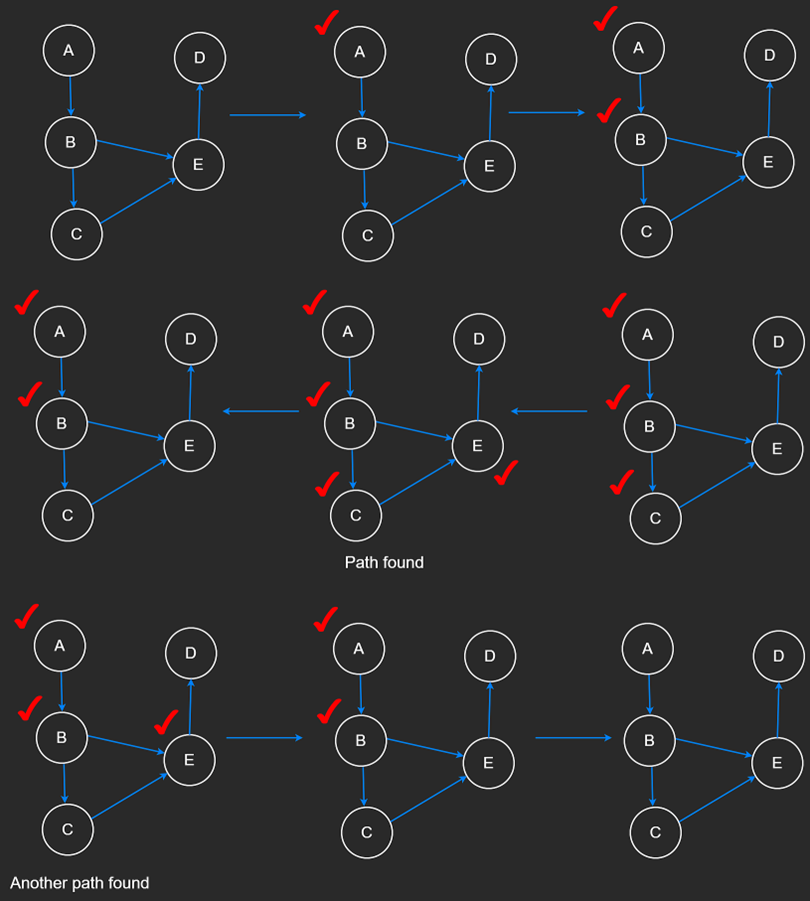

In [ ]:
# Count paths (backtracking)
def dfs(node, target, adjList, visit):
    if node in visit:
        return 0
    if node == target:
        return 1
    
    count = 0
    visit.add(node)
    for neighbor in adjList[node]:
        count += dfs(neighbor, target, adjList, visit)
    visit.remove(node)

    return count


### Time complexity

Backtracking is exponential. If we say that each vertex has on average $N$ edges, where this is at worst $V$ if each vertex was conneceted to every other vertex. If we were to represent traversal as a decision tree, then the height of that tree is $V$, then we need to do $N^V$ of work.

In the worst case where $N=V$, then the time complexity is $O(V^V)$

---

## BFS on Adjacency List

> Q: Find the shortest path from a source to a target

In [ ]:
from collections import deque
# Shortest path from node to target
def bfs(node, target, adjList):
    length = 0
    visit = set()
    visit.add(node)
    queue = deque()
    queue.append(node)

    while queue:
        for i in range(len(queue)):
            curr = queue.popleft()
            if curr == target:
                return length

            for neighbor in adjList[curr]:
                #make sure we havent already visited this new node
                if neighbor not in visit:
                    visit.add(neighbor)
                    queue.append(neighbor)
        length += 1
    return length

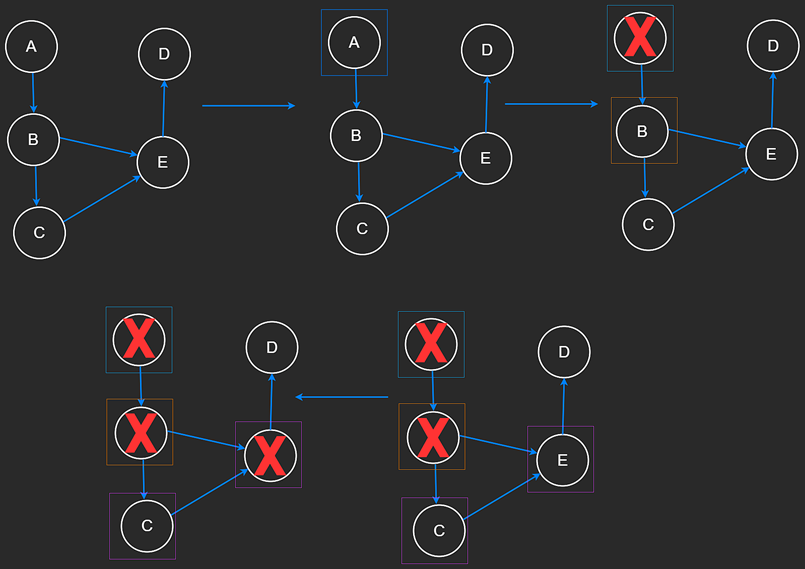

### Time Complexity

In the worst case BFS will visit every vertex and traverse every edge, so worst case is $O(V+E)$

---

## Implementation

Design a directed Graph class.

Constraints:

- Each vertex value will be a unique integer.
- Multiple edges from one vertex to another are not allowed.
- A vertex will not have an edge to itself, but the graph may contain a cycle.
- The graph is not necessarily connected (there may be disconnected components).

In [ ]:
# Graph Implementation using Adjacency List
class Graph:
    def __init__(self):
        self.adj_list = {}

    def addEdge(self, src: int, dst: int) -> None:
        # If src or dst don't exist, add them
        if src not in self.adj_list:
            self.adj_list[src] = set()
        if dst not in self.adj_list:
            self.adj_list[dst] = set()
        # Add edge if not already exists
        self.adj_list[src].add(dst)

    def removeEdge(self, src: int, dst: int) -> bool:
        # Check if src and dst exist in the graph
        if src not in self.adj_list or dst not in self.adj_list[src]:
            return False
        # Remove the edge
        self.adj_list[src].remove(dst)
        return True

    def hasPath(self, src: int, dst: int) -> bool:
        visited = set()
        return self._dfs(src, dst, visited)

    def _dfs(self, src: int, dst: int, visited: set) -> bool:
        if src == dst:
            return True
        visited.add(src)
        for neighbor in self.adj_list.get(src, []):
            if neighbor not in visited:
                #as long as a single instance True is found, return immediately
                if self._dfs(neighbor, dst, visited):
                    return True
        return False

    # Alternatively, use BFS for hasPath
    # def hasPathBFS(self, src: int, dst: int) -> bool:
    #     visited = set()
    #     queue = deque([src])
    #     while queue:
    #         curr = queue.popleft()
    #         if curr == dst:
    #             return True
    #         visited.add(curr)
    #         for neighbor in self.adj_list.get(curr, []):
    #             if neighbor not in visited:
    #                 queue.append(neighbor)
    #                 visited.add(neighbor)
    #     return False
